In [1]:
import pandas as pd
import numpy as np
string_data = pd.Series(['aardvark','artichoke',np.nan,'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [2]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

在pandas中，缺失值表示为NA（not available）。在统计学中，NA的数据可能是不存在的数据或者虽然存在，但是没有观察到。当进行数据清洗以进行分析时，最好直接对缺失数据进行分析，以判断数据采集的问题或缺失数据可能导致的偏差

In [3]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

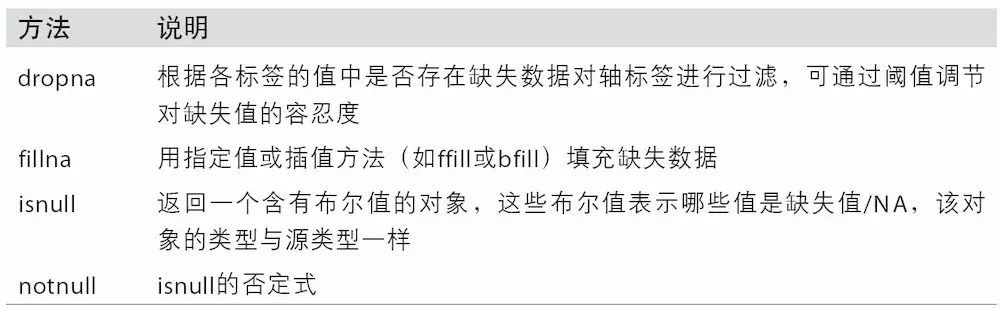

### 滤除缺失数据

    过滤掉缺失数据的方法有多种。你可以通过pandas.isnull或布尔索引的手工方法，但fropna可能会更加使用一些，对于一个Series，dropna返回一个仅含非空数据和索引值的Series

In [4]:
from numpy import nan as NA
data = pd.Series([1,NA,3.5,NA,7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [5]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [6]:
data = pd.DataFrame([[1.,6.5,3.],[1,NA,NA],
                    [NA,NA,NA],[NA,6.5,3.]])
cleaned = data.dropna()
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [7]:
cleaned

,0,1,2
0,1.0,6.5,3.0


传入how='all'将只丢弃全为NA的那一行

In [8]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


用这种方式丢弃列，传入axis=1即可

In [9]:
data[4]=NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [10]:
data.dropna(how='all',axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


另一个滤除DataFrame行的问题涉及时间序列数据。假设你只想留下一部分观测数据，可以用thresh参数来实现此目的：

In [11]:
df = pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,0.856176,0.202939,0.322232
1,-0.294206,0.566737,-0.562793
2,0.491586,-1.744311,0.264377
3,0.645945,-0.076212,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


In [12]:
df.iloc[:4,1] = NA
df

,0,1,2
0,0.856176,NaN,0.322232
1,-0.294206,NaN,-0.562793
2,0.491586,NaN,0.264377
3,0.645945,NaN,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


In [13]:
df.iloc[:2,2] = NA
df

,0,1,2
0,0.856176,NaN,NaN
1,-0.294206,NaN,NaN
2,0.491586,NaN,0.264377
3,0.645945,NaN,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


In [14]:
df.dropna()

,0,1,2
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


In [15]:
df.dropna(thresh=2)

,0,1,2
2,0.491586,NaN,0.264377
3,0.645945,NaN,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


### 填充缺失数据

In [16]:
df.fillna(0)

,0,1,2
0,0.856176,0.000000,0.000000
1,-0.294206,0.000000,0.000000
2,0.491586,0.000000,0.264377
3,0.645945,0.000000,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


若是通过一个字典调用fillna，就可以实现不同的列填充不同的值：

In [17]:
df.fillna({1:0.5,2:0})

,0,1,2
0,0.856176,0.500000,0.000000
1,-0.294206,0.500000,0.000000
2,0.491586,0.500000,0.264377
3,0.645945,0.500000,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


fillna默认会返回新对象，但也可以对现有对象进行就地修改：

In [18]:
_ = df.fillna(0,inplace=True)
df

,0,1,2
0,0.856176,0.000000,0.000000
1,-0.294206,0.000000,0.000000
2,0.491586,0.000000,0.264377
3,0.645945,0.000000,1.886442
4,-1.180504,-1.442841,1.672286
5,0.304258,0.596032,-0.533851
6,0.464614,-0.896882,0.402701


对reindexing有效的那些插值方法也可用于fillna：

In [19]:
df = pd.DataFrame(np.random.randn(6,3))
df.iloc[2:,1] = NA
df.iloc[4:,2] = NA
df

,0,1,2
0,1.277560,0.589702,0.938571
1,-0.058454,0.884085,-2.064114
2,0.441315,NaN,-0.121430
3,0.798948,NaN,-1.204778
4,0.076700,NaN,NaN
5,1.018290,NaN,NaN


In [20]:
df.fillna(method='ffill')

,0,1,2
0,1.277560,0.589702,0.938571
1,-0.058454,0.884085,-2.064114
2,0.441315,0.884085,-0.121430
3,0.798948,0.884085,-1.204778
4,0.076700,0.884085,-1.204778
5,1.018290,0.884085,-1.204778


In [21]:
df.fillna(method='ffill',limit=2)

,0,1,2
0,1.277560,0.589702,0.938571
1,-0.058454,0.884085,-2.064114
2,0.441315,0.884085,-0.121430
3,0.798948,0.884085,-1.204778
4,0.076700,NaN,-1.204778
5,1.018290,NaN,-1.204778


In [23]:
data = pd.Series([1.,NA,3.5,NA,7])
data.fillna(data.mean())#平均值

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

fillna的参数
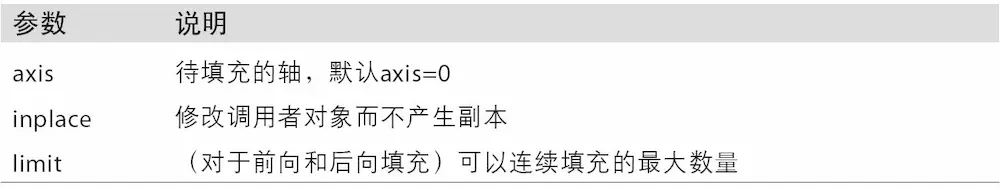
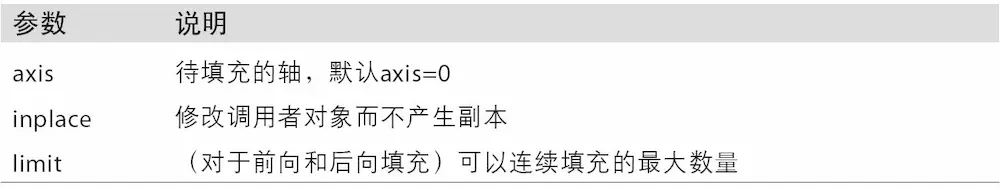

# 数据转换

### 移除重复数据

In [24]:
data = pd.DataFrame({'k1':['one1','two']*3+['two'],
                    'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one1,1
1,two,1
2,one1,2
3,two,3
4,one1,3
5,two,4
6,two,4


    DataFrame的duplicated方法返回一个布尔型的Series，表示各行是否重复行（前面出现的行）

In [25]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

还有一个drop_duplicates方法，返回一个DataFrame，重复的数组会标False

In [26]:
data.drop_duplicates()

,k1,k2
0,one1,1
1,two,1
2,one1,2
3,two,3
4,one1,3
5,two,4
